In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV

import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Setting the default styling attributes for seaborn
sns.set_theme(style='darkgrid')

In [ ]:
df = pd.read_csv('/content/weatherAUS.csv')


In [ ]:
df.shape

(145460, 23)

In [ ]:
##Exploratory data analysis

In [ ]:
##Data Preview
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Observations:

The Date column needs converted to a datetime datatype
The datatypes for all other columns look good as is
There appears to be a large number of missing values across multiple columns
Looking into the number of missing values per column as a percentage:



In [ ]:
round(df.isnull().sum() / len(df),3)

,0
Date,0.000
Location,0.000
MinTemp,0.010
MaxTemp,0.009
Rainfall,0.022
Evaporation,0.432
Sunshine,0.480
WindGustDir,0.071
WindGustSpeed,0.071
WindDir9am,0.073


Observations:

Evaporation, Sunshine, Cloud9am, and Cloud3pm are all missing more than 35% of their values
Aside from Date and Location, all columns are missing at least some values
These missing values can be handled by either dropping certain columns/rows, imputing the values, or a mix of both
Next, taking a look at some summary statistics:

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Observations:

Multiple columns have clear outliers (e.g., the max Rainfall value is 371.0 despite the 75th percentile being 0.8)
Not seeing any values that are immediate cause for concern (such as a negative value for minimum Rainfall)

In order to get a better feel for the data and catch any placeholder values that may not have shown up in the summary statistics, I also want to check the top five most frequent values for each column.

In [ ]:
for col in df.columns:
    print('\n')
    print(col)
    print('-'*15)
    print(df[col].value_counts(normalize=True).head())



Date
---------------
Date
2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
Name: proportion, dtype: float64


Location
---------------
Location
Canberra     0.023622
Sydney       0.022989
Darwin       0.021951
Melbourne    0.021951
Brisbane     0.021951
Name: proportion, dtype: float64


MinTemp
---------------
MinTemp
11.0    0.006244
10.2    0.006237
9.6     0.006223
10.5    0.006140
9.0     0.006057
Name: proportion, dtype: float64


MaxTemp
---------------
MaxTemp
20.0    0.006137
19.0    0.005846
19.8    0.005825
20.4    0.005784
19.9    0.005707
Name: proportion, dtype: float64


Rainfall
---------------
Rainfall
0.0    0.640511
0.2    0.061611
0.4    0.026597
0.6    0.018228
0.8    0.014459
Name: proportion, dtype: float64


Evaporation
---------------
Evaporation
4.0    0.040390
8.0    0.031559
2.2    0.025342
2.0    0.024580
2.4    0.024229
Name: proportion, dtype: float64


Sunshine
---------------
Sunshine
0

Observations:

The value counts of the Date column need further explored on a non-normalized basis
There's a disconnect between the Rainfall value counts and the RainToday / RainTomorrow value counts. While roughly 64% of observations had a value of 0 for Rainfall, about 77.5% of days did not have rainfall according to the latter two columns. This discrepency is likely due to differences in the number of missing values for each column

The RainToday and RainTomorrow columns should be converted to 0s and 1s for easier manipulation
Further exploring the Date column:

In [ ]:
df.Date.value_counts()

,count
Date,
2013-11-12,49
2014-09-01,49
2014-08-23,49
2014-08-24,49
2014-08-25,49
...,...
2007-11-29,1
2007-11-28,1
2007-11-27,1


In [ ]:
df.Location.nunique()

49

The maximum number of observations for a given date aligns with the number of unique locations within the dataset. This intuitively makes sense because each weather station at the different locations would be reporting their own data for a given day.

Adjusting the RainToday and RainTomorrow columns:

In [ ]:
df.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})
df.RainToday.value_counts(normalize=True)

,proportion
RainToday,
0.0,0.775807
1.0,0.224193


In [ ]:
df.RainTomorrow = df.RainTomorrow.map({'No': 0, 'Yes': 1})
df.RainTomorrow.value_counts(normalize=True)

,proportion
RainTomorrow,
0.0,0.775819
1.0,0.224181


Text(0.5, 1.0, 'Histograms of Columns')

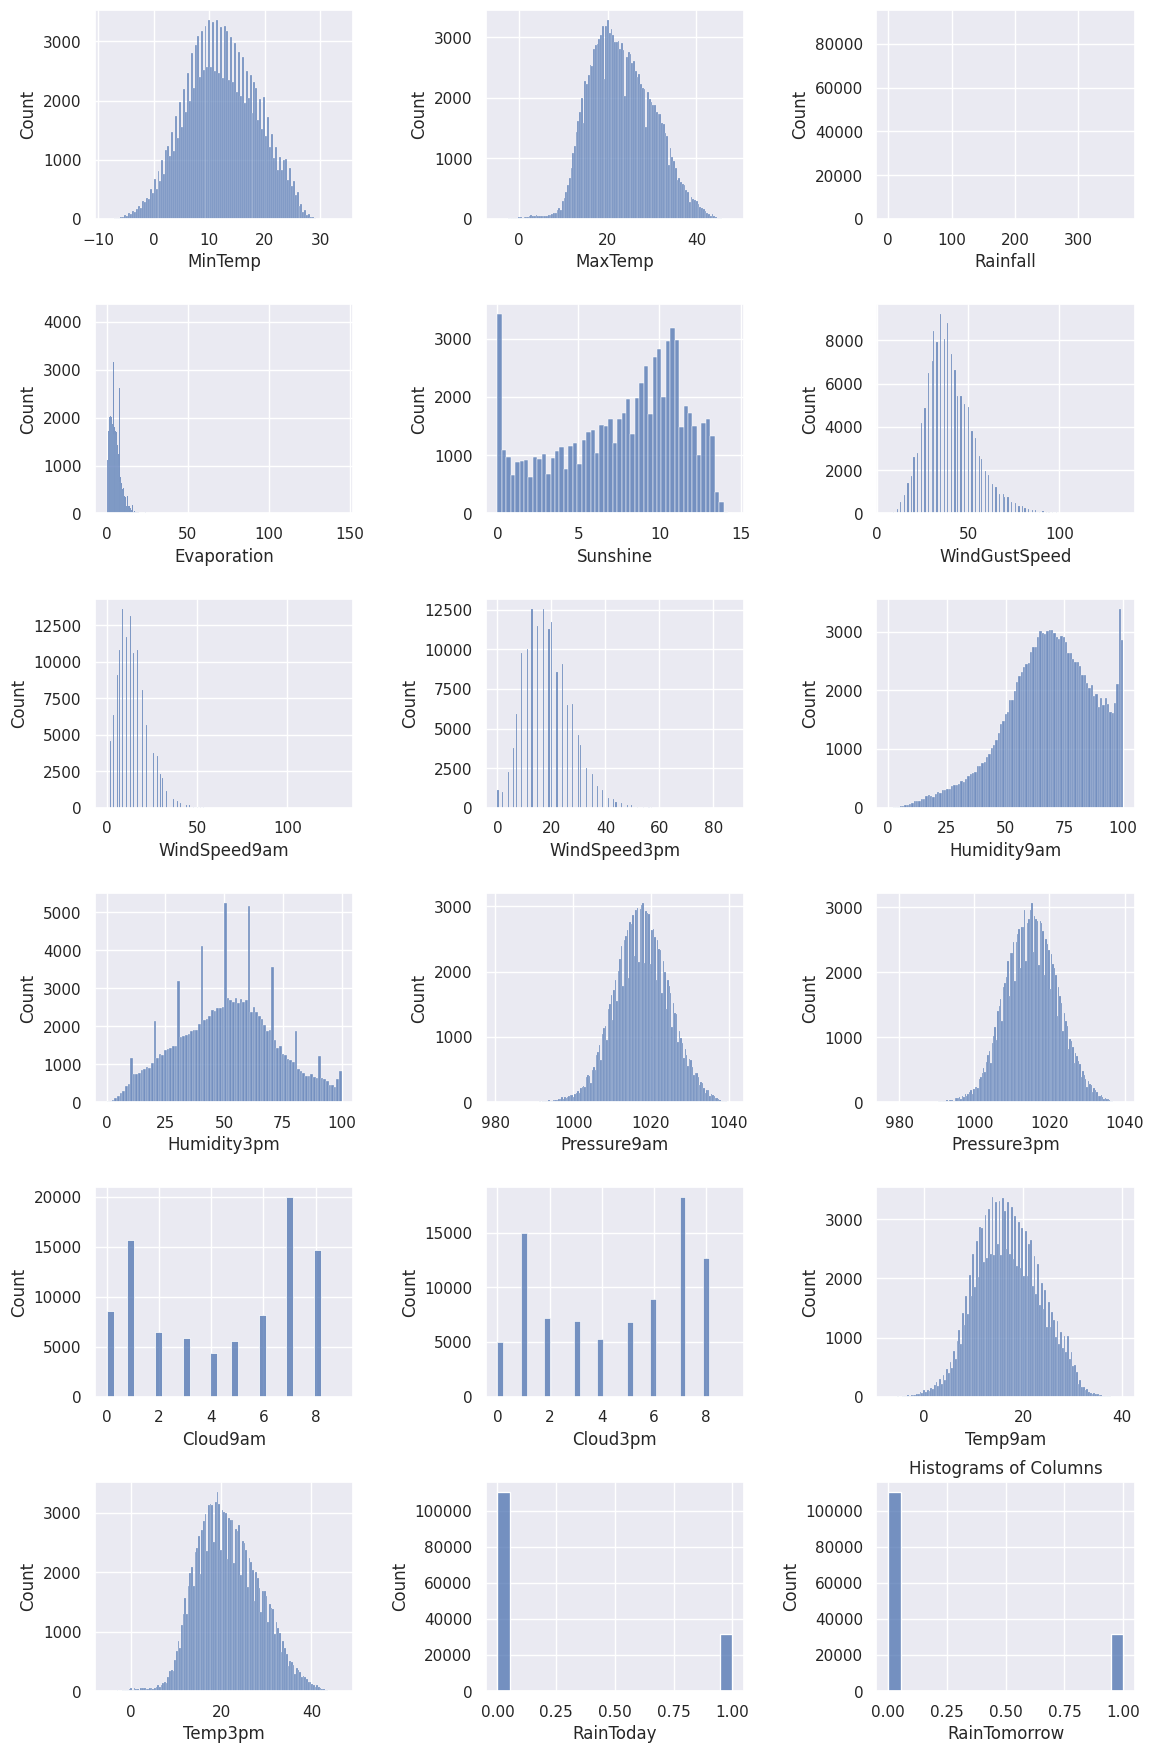

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))
axes = axes.reshape(-1)

continuous = [col for col in df.columns if df[col].dtype != object]
for i, col in enumerate(continuous):
    sns.histplot(df[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.title('Histograms of Columns')


Observations:

Most features are normally distributed as expected
The Rainfall distribution needs further investigation as the large outlier is likely affecting the ability to plot the data
The Sunshine distribution is interesting but largely explainable:
The high frequency of 0 values represents days where it is overcast all day
The abrupt decline in frequency after around 11 hours is a reflection of the limited number of days of the year where it is light out for that many hours or longer
The Humidity9am distribution is particularly interesting due to the large spike in frequencies near 100%
Since the summary statistics section showed that the 75th percentile for the Rainfall feature is only 0.8, the following plot shows the distribution of values betwen 0 and 1.

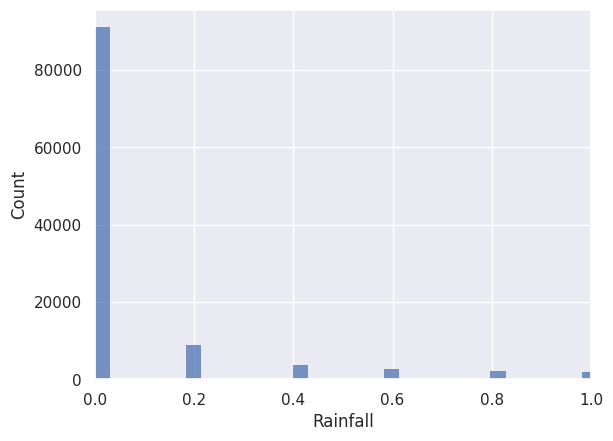

In [ ]:
sns.histplot(df.Rainfall)
plt.xlim(0, 1);

In [ ]:
df_rain_by_loc = df.groupby(by='Location').sum()
df_rain_by_loc = df_rain_by_loc[['RainToday']]
df_rain_by_loc.head()

,RainToday
Location,
Adelaide,689.0
Albany,902.0
Albury,617.0
AliceSprings,244.0
BadgerysCreek,583.0


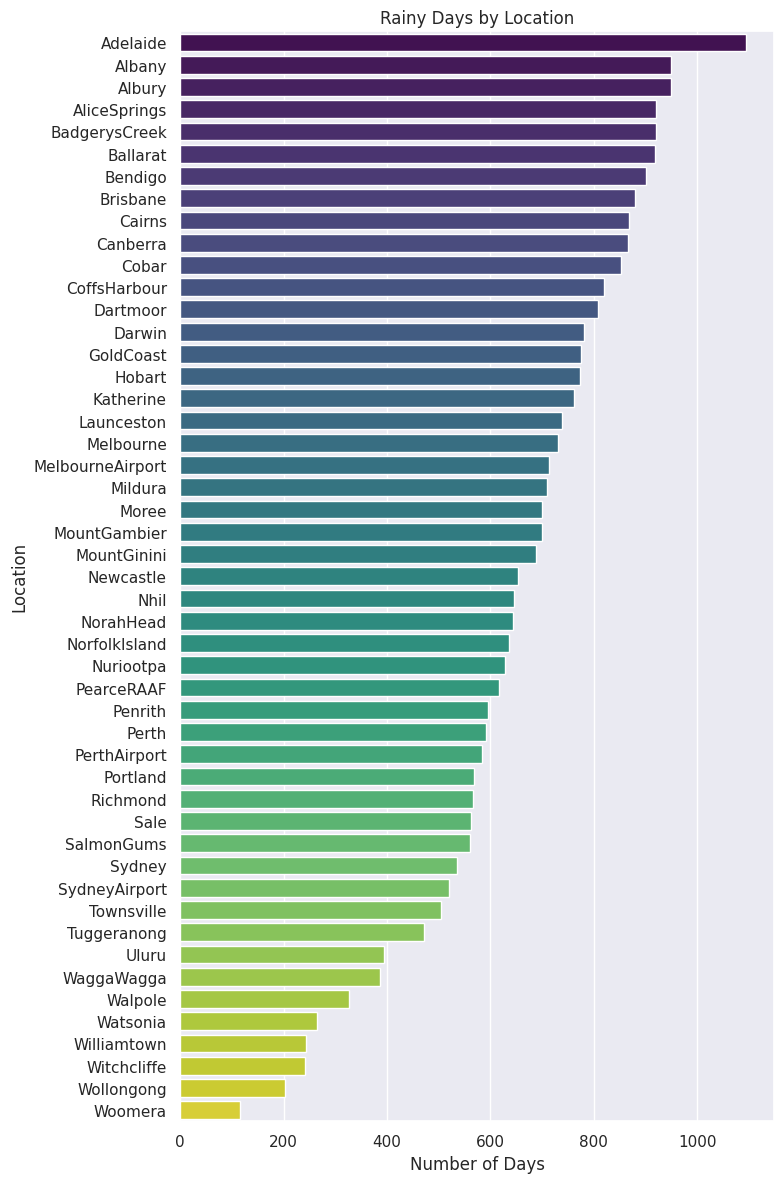

In [ ]:
plt.figure(figsize=(8, 12))
sns.barplot(x='RainToday',
            y=df_rain_by_loc.index,
            data=df_rain_by_loc.sort_values('RainToday', ascending=False),
            orient='h',
            palette='viridis'
           )
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')
plt.tight_layout()

The above chart is useful for a quick check on the differences between locations with regard to the number of rainy days but suffers from one key issue: the number of observations from each location is not exactly the same. Checking the value counts for each location (below) reveals that the locations of Katherine, Nhil, and Uluru should be ignored when analyzing the above plot. The remaining locations have value counts that are close enough to be properly comparabl

In [ ]:
df.Location.value_counts()

,count
Location,
Canberra,3436
Sydney,3344
Darwin,3193
Melbourne,3193
Brisbane,3193
Adelaide,3193
Perth,3193
Hobart,3193
Albany,3040


Rainfall exhibits seasonality in many areas of the world. Through grouping the data by month of the year, the percentage of days that it rains in a given month can be easily calculated. Any sort of trend would indicate that the month of the year is a valuable piece of information for modeling purposes.

In [ ]:
df_seasonality = df.copy()
df_seasonality['month'] = df_seasonality.Date.apply(lambda x: int(str(x)[5:7]))
df_seasonality[['Date', 'month']].head()

,Date,month
0,2008-12-01,12
1,2008-12-02,12
2,2008-12-03,12
3,2008-12-04,12
4,2008-12-05,12


In [ ]:
df_seasonality_grouped = df_seasonality.groupby('month')['RainToday'].mean()
df_seasonality_grouped

,RainToday
month,
1,0.189484
2,0.206746
3,0.217135
4,0.216845
5,0.222163
6,0.263638
7,0.270736
8,0.253167
9,0.229135


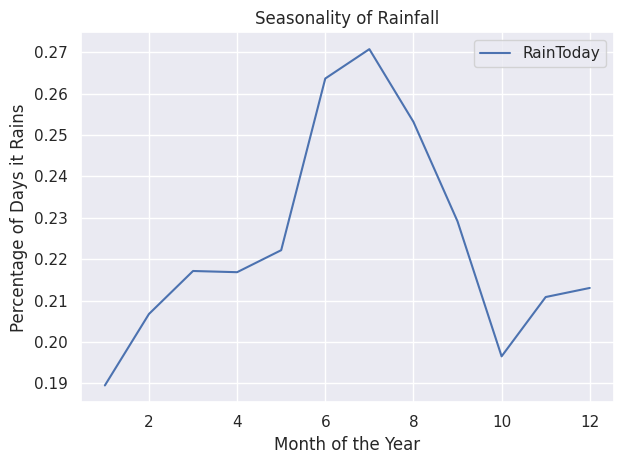

In [ ]:
# Convert the pandas Series to a DataFrame
df_seasonality_grouped = df_seasonality_grouped.to_frame()

# Create the line plot
sns.lineplot(data=df_seasonality_grouped)
plt.title('Seasonality of Rainfall')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage of Days it Rains')
plt.tight_layout()
plt.show()

Rainfall in Australia clearly has a degree of seasonality.

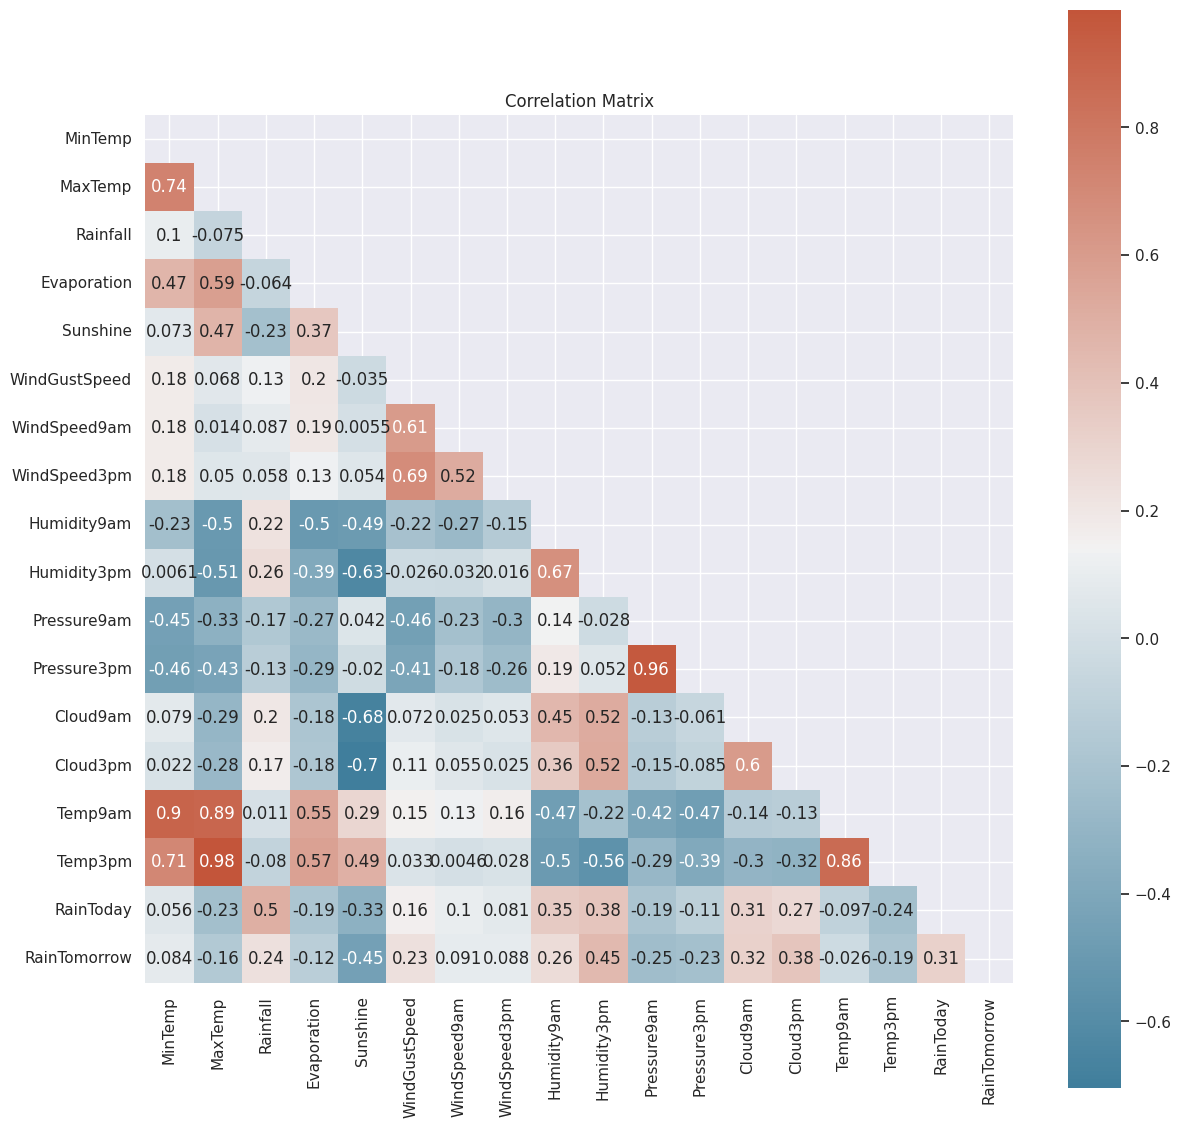

In [ ]:
# Select only the numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Creating a mask to block the top right half of the heatmap (redundant information)
mask = np.triu(np.ones_like(corr_matrix))

# Custom color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create the heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, square=True)
plt.title('Correlation Matrix')
plt.show()

Observations:

Nothing in this correlation heatmap is surprising
Features with strong correlations (either positive or negative) have intuitive reasons for being so

Data Preprocessing
Missing Values
The primary preprocessing need for this dataset is handling the missing values. Given the strong correlations between certain features, using a multivariate feature imputation method makes sense. While still experimental, the IterativeImputer module from sklearn is perfect for this use case and appears stable enough. This module...

"...models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned."

Source: 6.4.3. Multivariate feature imputation

I do not want to impute values for the target variable (RainTomorrow) since this will detract from the ground truth and have potential negative effects on the model. To start, I'll drop rows in which the RainTomorrow value is missing.

In [ ]:
df_imputed = df.dropna(axis=0, subset=['RainTomorrow'])
df_imputed.isna().sum()

,0
Date,0
Location,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013


Continuous Features
For the continuous features, I'll apply the IterativeImputer.

In [ ]:
cont_feats = [col for col in df_imputed.columns if df_imputed[col].dtype != object]
cont_feats.remove('RainTomorrow')
cont_feats

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [ ]:
imputer = IterativeImputer(random_state=42)
df_imputed_cont = imputer.fit_transform(df_imputed[cont_feats])
df_imputed_cont = pd.DataFrame(df_imputed_cont, columns=cont_feats)
df_imputed_cont.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.103048,16.9,21.8,0.0
1,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.912027,2.640581,17.2,24.3,0.0
2,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.014404,2.000000,21.0,23.2,0.0
3,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.201990,1.993914,18.1,26.5,0.0
4,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0


In [ ]:
df_imputed_cont.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

Categorical Features
For the categorical features, I'll be replacing the missing values with a randomly chosen option from the unique values of each feature according to their probability distribution.

In [ ]:
cat_feats = [col for col in df_imputed.columns if col not in cont_feats]
cat_feats.remove('RainTomorrow')

# Also removing Date and Location since no values are missing
cat_feats.remove('Date')
cat_feats.remove('Location')
cat_feats

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [ ]:
df_imputed_cat = df_imputed[cat_feats]

for col in df_imputed_cat.columns:
    # Get values and probabilities without renaming the index
    value_counts = df_imputed_cat.WindDir3pm.value_counts()
    values = value_counts.index.values
    probs = value_counts.values / value_counts.sum()  # Normalize probabilities

    df_imputed_cat[col].replace(np.nan, np.random.choice(a=values, p=probs), inplace=True)

df_imputed_cat.head()

,WindGustDir,WindDir9am,WindDir3pm
0,W,W,WNW
1,WNW,NNW,WSW
2,WSW,W,WSW
3,NE,SE,E
4,W,ENE,NW


In [ ]:
df_imputed_cat.isna().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

In [ ]:
df_date_loc = df_imputed[['Date', 'Location']]
df_target = df_imputed.RainTomorrow

print(df_date_loc.shape)
print(df_imputed_cont.shape)
print(df_imputed_cat.shape)
print(df_target.shape)

(142193, 2)
(142193, 17)
(142193, 3)
(142193,)


In [ ]:
df_imputed_final = pd.concat(objs=[df_date_loc.reset_index(drop=True),
                                   df_imputed_cont.reset_index(drop=True),
                                   df_imputed_cat.reset_index(drop=True),
                                   df_target.reset_index(drop=True)
                                  ],
                             axis=1
                            )
df_imputed_final.shape

(142193, 23)

In [ ]:
df_imputed_final.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,...,1007.1,8.000000,5.103048,16.9,21.8,0.0,W,W,WNW,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,...,1007.8,1.912027,2.640581,17.2,24.3,0.0,WNW,NNW,WSW,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,...,1008.7,2.014404,2.000000,21.0,23.2,0.0,WSW,W,WSW,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,...,1012.8,1.201990,1.993914,18.1,26.5,0.0,NE,SE,E,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW,0.0


In [ ]:
df_imputed_final.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainTomorrow     0
dtype: int64

Extracting the Month
As seen in the EDA section, rainfall in Australia exhibits seasonality. Instead of using the full date from the Date column, extracting just the month is much more valuable

In [ ]:
df_month = df_imputed_final.copy()
df_month.insert(1, 'Month', df_month.Date.apply(lambda x: int(str(x)[5:7])))
df_month.drop(columns='Date', inplace=True)
df_month.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,12,Albury,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,...,1007.1,8.000000,5.103048,16.9,21.8,0.0,W,W,WNW,0.0
1,12,Albury,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,...,1007.8,1.912027,2.640581,17.2,24.3,0.0,WNW,NNW,WSW,0.0
2,12,Albury,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,...,1008.7,2.014404,2.000000,21.0,23.2,0.0,WSW,W,WSW,0.0
3,12,Albury,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,...,1012.8,1.201990,1.993914,18.1,26.5,0.0,NE,SE,E,0.0
4,12,Albury,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW,0.0


In [ ]:
rain_today_counts = df_month['RainToday'].value_counts()
print("RainToday counts:")
print(rain_today_counts)

# Count occurrences of 0 and 1 in 'RainTomorrow'
rain_tomorrow_counts = df_month['RainTomorrow'].value_counts()
print("\nRainTomorrow counts:")
print(rain_tomorrow_counts)

RainToday counts:
RainToday
 0.000000    109332
 1.000000     31455
 0.223905         5
-0.212430         1
 0.059504         1
              ...  
 0.821150         1
 0.543710         1
 0.661142         1
 0.480625         1
-0.123669         1
Name: count, Length: 1404, dtype: int64

RainTomorrow counts:
RainTomorrow
0.0    110316
1.0     31877
Name: count, dtype: int64


Dummy Variables
All categorical features now need transformed into dummy variables in order to be useable in the modeling section.



In [ ]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df_dummies = pd.get_dummies(df_month, columns=categoricals ,  dtype=int)
df_dummies.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


MODELING

In [ ]:
df_final = df_dummies.copy()
X = df_final.drop(columns='RainTomorrow')
y = df_final.RainTomorrow

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

print('Train size:', X_train.shape[0])
print('Test size: ', X_test.shape[0])

Train size: 99535
Test size:  42658


LOGISTIC

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 1., 0.])

In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, auc)
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC AUC curve

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_sc = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Training and testing scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # ROC AUC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_sc:.4f}")
    print(f"Training Score: {train_score:.4f}")
    print(f"Testing Score: {test_score:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    disp.plot()

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'(AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

    return accuracy, precision, recall, f1_sc, train_score, test_score, roc_auc


Accuracy: 0.8403
Precision: 0.7070
Recall: 0.4862
F1 Score: 0.5762
Training Score: 0.8420
Testing Score: 0.8403
ROC AUC: 0.8580


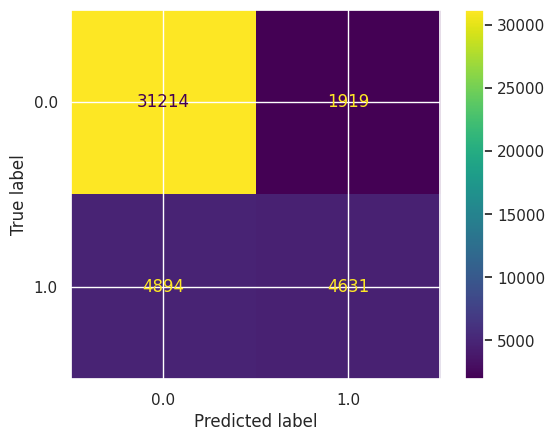

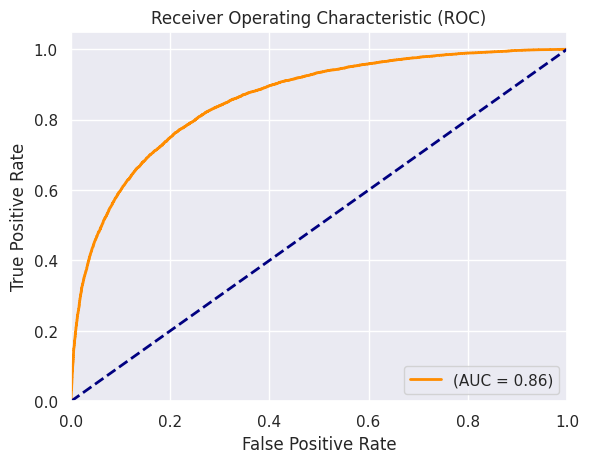

(0.8402878709737915,
 0.7070229007633588,
 0.4861942257217848,
 0.5761741835147746,
 0.8419852313256644,
 0.8402878709737915,
 0.858005577299095)

In [ ]:
evaluate_model(logreg, X_train, y_train, X_test, y_test)


Observations:

Decent performance for a baseline model

Recall is the weakest point, particularly for days where it does rain tomorrow

The model is well fit, with both the train and test scores approximately the same

Correcting Class Imbalance
A class imbalance currently exists for the target variable. Correcting for this may help improve model performance. To do so, I will resample the training data using SMOTE.

In [ ]:
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

print('Original')
print('-'*20)
print(y_train.value_counts())
print('\n')
print('SMOTE')
print('-'*20)
print(pd.Series(y_train_resampled).value_counts())

Original
--------------------
RainTomorrow
0.0    77183
1.0    22352
Name: count, dtype: int64


SMOTE
--------------------
RainTomorrow
0.0    77183
1.0    77183
Name: count, dtype: int64


In [ ]:
logreg_smote = LogisticRegression(random_state=42)
logreg_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = logreg_smote.predict(X_test)
y_pred_smote

array([1., 1., 0., ..., 0., 1., 0.])

Accuracy: 0.7915
Precision: 0.5232
Recall: 0.7465
F1 Score: 0.6152
Training Score: 0.7910
Testing Score: 0.7915
ROC AUC: 0.8582


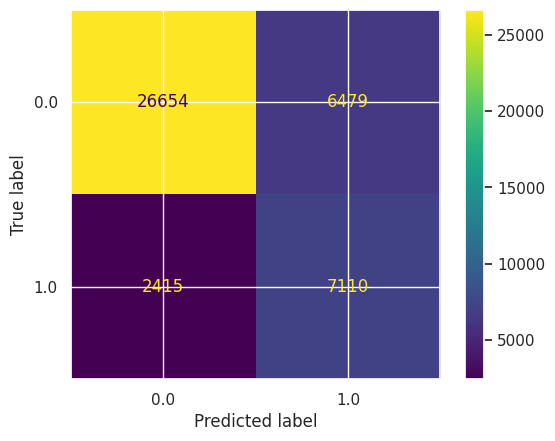

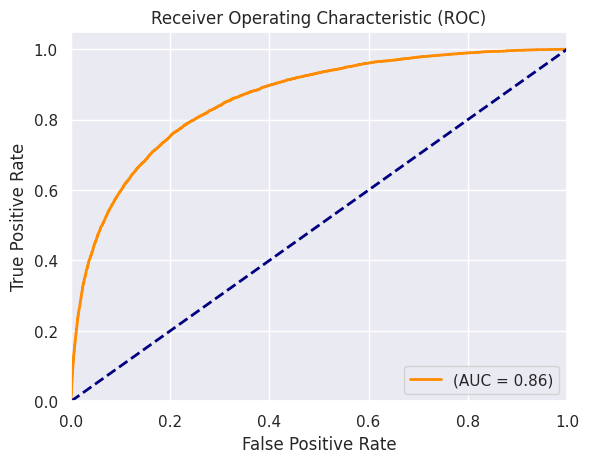

(0.7915045243565099,
 0.5232173081168592,
 0.7464566929133858,
 0.6152115600934498,
 0.7909643315237811,
 0.7915045243565099,
 0.8581991627951707)

In [ ]:
evaluate_model(logreg_smote, X_train_resampled,y_train_resampled, X_test, y_test)

Observations:

Despite a slight increase in the positive F1 score, the accuracy of this model sharply decreased
This model remains well fit but scores for both the train and test sets decreased
Contrary to my initial thoughts, using SMOTE actually had worse performance and will not be utilized in subsequent iterations

Hyperparameter Tuning

In [ ]:
'''logreg_params = {
    'C': [1, 1e8, 1e16],
    'fit_intercept': [True, False],
    'max_iter': [50, 100, 150],
    'random_state': [42]
}

logreg_gs = GridSearchCV(logreg_smote, logreg_params, scoring='f1', cv=3)
logreg_gs.fit(X_train, y_train)'''

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 100000000.0, 1e+16],
                         'fit_intercept': [True, False],
                         'max_iter': [50, 100, 150], 'random_state': [42]},
             scoring='f1')

Accuracy: 0.8409
Precision: 0.7083
Recall: 0.4885
F1 Score: 0.5782
Training Score: 0.6355
Testing Score: 0.5782
ROC AUC: 0.8597


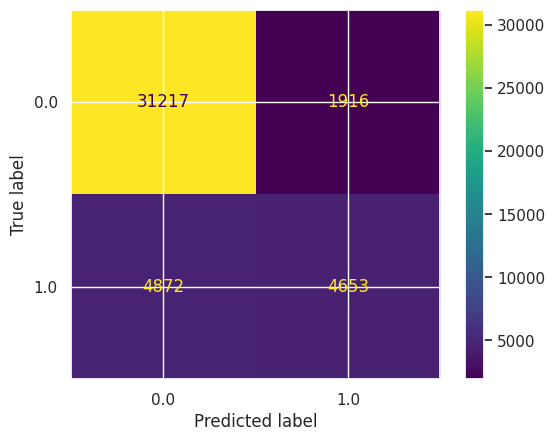

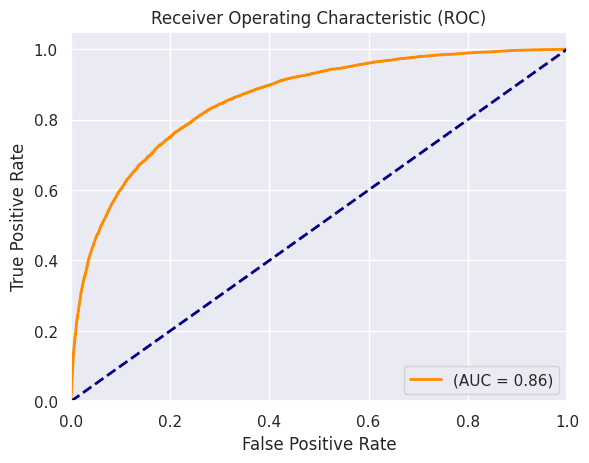

(0.8408739275165268,
 0.7083269904094992,
 0.48850393700787403,
 0.5782279110227414,
 0.6355221459449968,
 0.5782279110227414,
 0.8596598153326691)

In [ ]:
'''evaluate_model(logreg_gs, X_train_resampled, y_train_resampled, X_test, y_test)'''

Observations:

Slight improvements in precision and model fitness
Overall, not much improvement over the baseline logreg model

Decision Tree

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
y_pred_tree

array([1., 0., 0., ..., 0., 1., 0.])

Accuracy: 0.7922
Precision: 0.5340
Recall: 0.5448
F1 Score: 0.5393
Training Score: 1.0000
Testing Score: 0.7922
ROC AUC: 0.7041


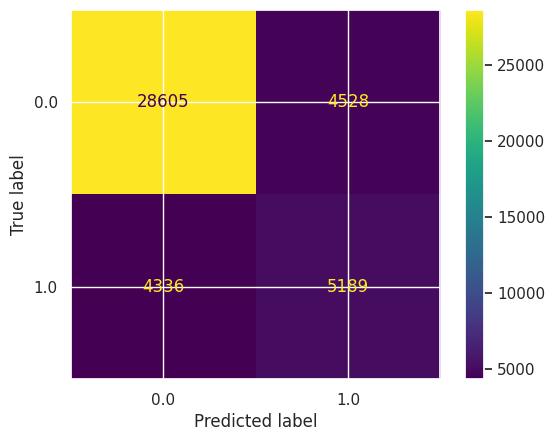

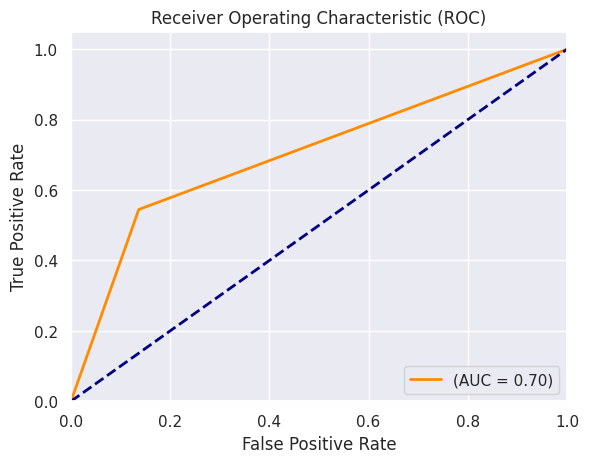

(0.7922077922077922,
 0.5340125553154266,
 0.5447769028871391,
 0.5393410248414926,
 0.9999899532827649,
 0.7922077922077922,
 0.7040577841330332)

In [ ]:
evaluate_model(clf, X_train, y_train, X_test, y_test)

Observations:

The accuracy is lower than the tuned logisitic regression model
The model is overfit, given by the much higher score for the train data versus the test data

In [ ]:
clf_smote = DecisionTreeClassifier()
clf_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = clf_smote.predict(X_test)
y_pred_smote

array([0., 0., 0., ..., 0., 1., 1.])

Accuracy: 0.7731
Precision: 0.4929
Recall: 0.5617
F1 Score: 0.5251
Training Score: 1.0000
Testing Score: 0.7731
ROC AUC: 0.6978


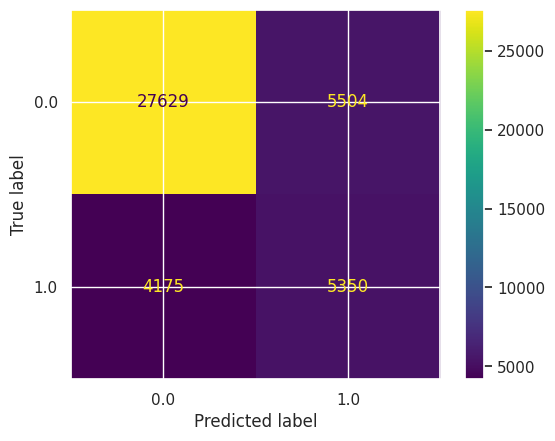

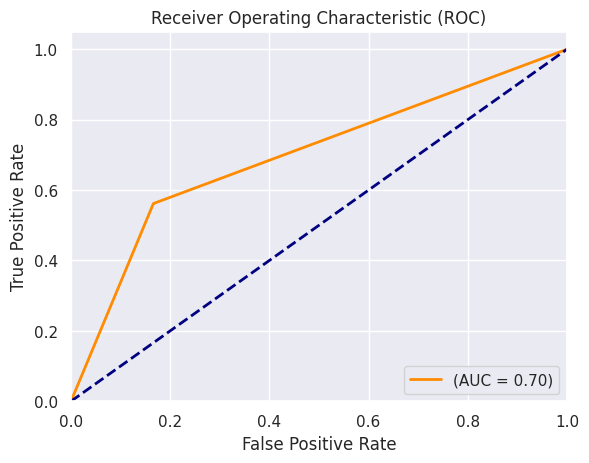

(0.7731023489146233,
 0.4929058411645476,
 0.5616797900262467,
 0.5250502968742333,
 0.9999935218895353,
 0.7731023489146233,
 0.6977608656371248)

In [ ]:
evaluate_model(clf_smote, X_train_resampled, y_train_resampled, X_test, y_test)

In [ ]:
'''params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}

clf_gs = GridSearchCV(clf_smote, param_grid=params, scoring='f1', cv=3)
clf_gs.fit(X_train, y_train)'''

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 11], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42]},
             scoring='f1')

Accuracy: 0.8364
Precision: 0.6721
Recall: 0.5223
F1 Score: 0.5878
Training Score: 0.7018
Testing Score: 0.5878
ROC AUC: 0.8373


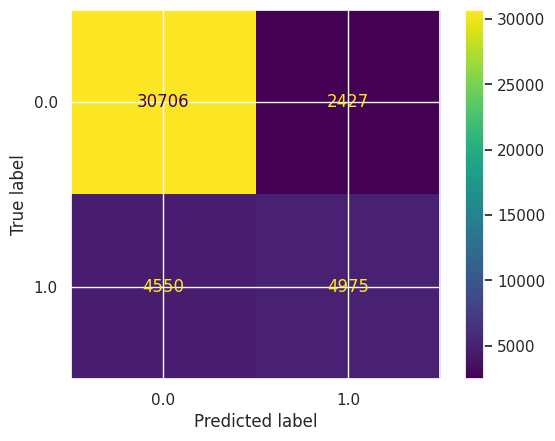

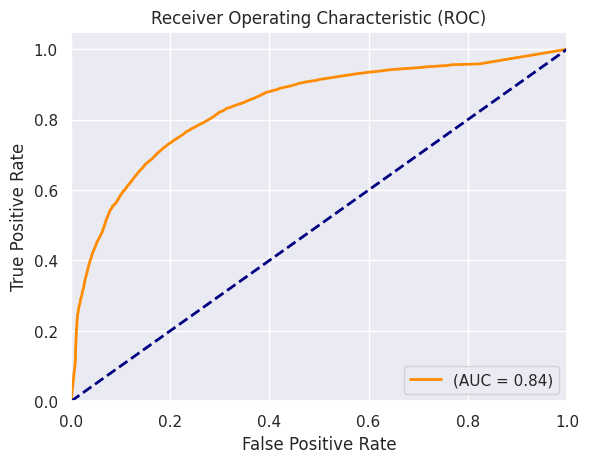

(0.8364433400534483,
 0.6721156444204269,
 0.5223097112860893,
 0.5878182784899865,
 0.7018087690144444,
 0.5878182784899865,
 0.8373462763175188)

In [ ]:
evaluate_model(clf_gs, X_train_resampled, y_train_resampled, X_test, y_test)

Observations:

Solid increases in the evaluation metrics
The tuned model is much better fit than the baseline model which showed overfitness

Random Forest


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1., 0., 0., ..., 0., 1., 0.])

Accuracy: 0.8551
Precision: 0.7665
Recall: 0.5050
F1 Score: 0.6089
Training Score: 1.0000
Testing Score: 0.8551
ROC AUC: 0.8827


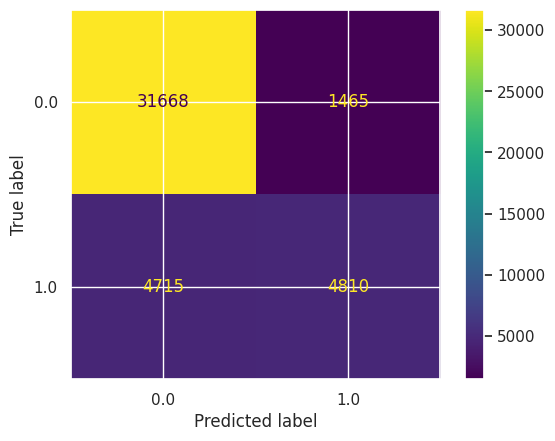

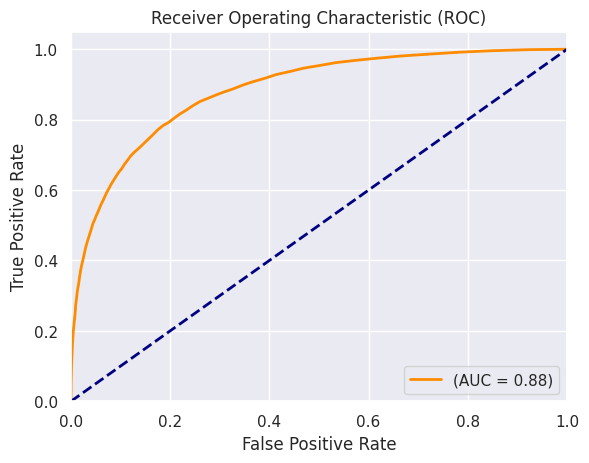

(0.8551268226358479,
 0.7665338645418327,
 0.50498687664042,
 0.6088607594936709,
 0.9999899532827649,
 0.8551268226358479,
 0.8827452754836093)

In [ ]:
evaluate_model(rf, X_train, y_train, X_test, y_test)

Observations:

Good scores on the evaluation metrics
The model is a bit overfit

In [ ]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = rf_smote.predict(X_test)
y_pred_smote

array([1., 0., 0., ..., 0., 0., 0.])

Accuracy: 0.8538
Precision: 0.7020
Recall: 0.6001
F1 Score: 0.6471
Training Score: 1.0000
Testing Score: 0.8538
ROC AUC: 0.8842


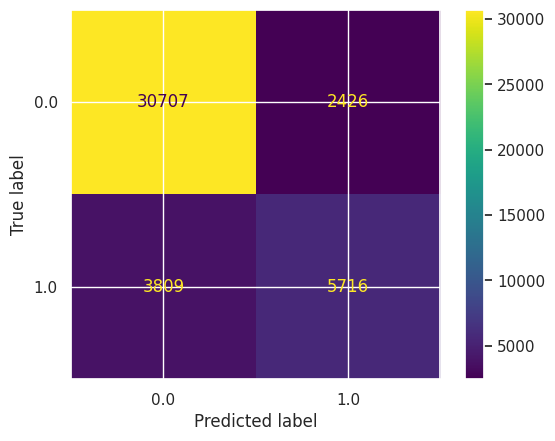

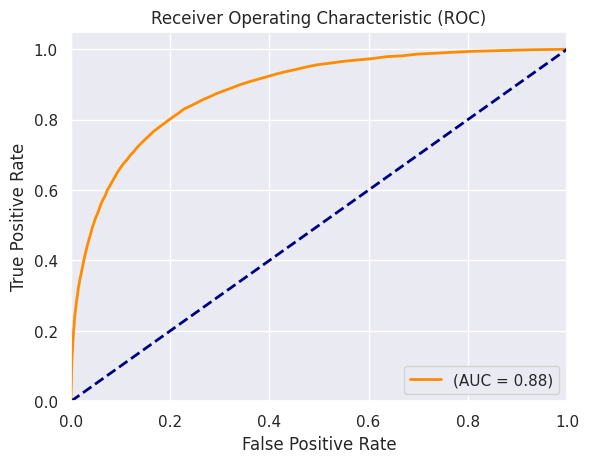

(0.8538374982418304,
 0.7020388111029231,
 0.6001049868766404,
 0.6470821305258392,
 0.9999935218895353,
 0.8538374982418304,
 0.8841783560141332)

In [ ]:
evaluate_model(rf_smote, X_train_resampled, y_train_resampled, X_test, y_test)

In [ ]:
from sklearn.utils import shuffle

# Shuffle and sample 20% of the data
X_train_sample, y_train_sample = shuffle(X_train_resampled, y_train_resampled, random_state=42)
X_train_sample = X_train_sample[:int(0.2 * len(X_train))]
y_train_sample = y_train_sample[:int(0.2 * len(y_train))]

In [ ]:
rf_params = {
    'n_estimators': [10, 35, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}

rf_gs = GridSearchCV(rf_smote, param_grid=rf_params, scoring='f1', cv=3)
rf_gs.fit(X_train_sample, y_train_sample)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 11], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 35, 100], 'random_state': [42]},
             scoring='f1')

In [ ]:
best_params = rf_gs.best_params_
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train_resampled, y_train_resampled)
y_pred_best = rf_best.predict(X_test)
y_pred_best



array([1., 0., 0., ..., 0., 1., 0.])

In [ ]:
rf_params = {
    'n_estimators': [10, 35, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}

rf_gs = GridSearchCV(rf_smote, param_grid=rf_params, scoring='accuracy', cv=3)
rf_gs.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
rf_gs.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100,
 'random_state': 42}

In [ ]:
round(rf_gs.best_score_, 4)

0.8309

In [ ]:
y_pred_rf_gs = rf_gs.predict(X_test)
y_pred_rf_gs

array([1., 1., 0., ..., 0., 1., 0.])

Accuracy: 0.8073
Precision: 0.5525
Recall: 0.7205
F1 Score: 0.6254
Training Score: 0.8379
Testing Score: 0.6254
ROC AUC: 0.8628


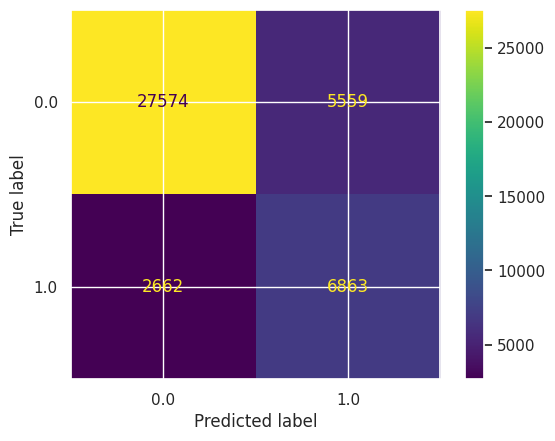

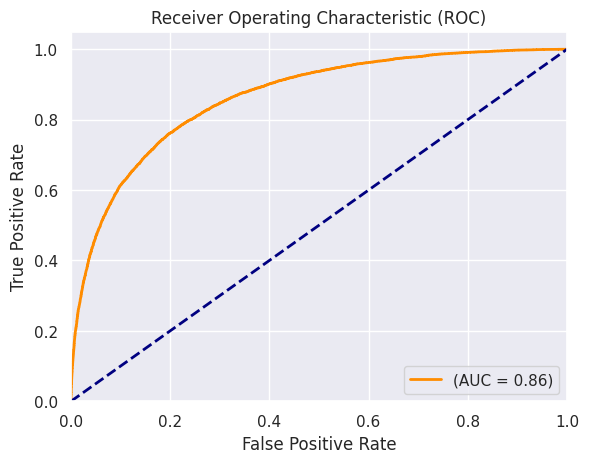

(0.8072811664869427,
 0.552487522138142,
 0.7205249343832021,
 0.6254157743655169,
 0.837949590086786,
 0.6254157743655169,
 0.8628132842160916)

In [ ]:
evaluate_model(rf_gs,  X_train_resampled, y_train_resampled, X_test, y_test)

Observations:

The accuracy score remained roughly the same while the F1 score decreased
Small increase in the AUC of the ROC curve
Furthermore, the tuned model has a much better fit than the baseline model

XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([1, 0, 0, ..., 0, 0, 0])

Accuracy: 0.8606
Precision: 0.7493
Recall: 0.5647
F1 Score: 0.6440
Training Score: 0.8937
Testing Score: 0.8606
ROC AUC: 0.8926


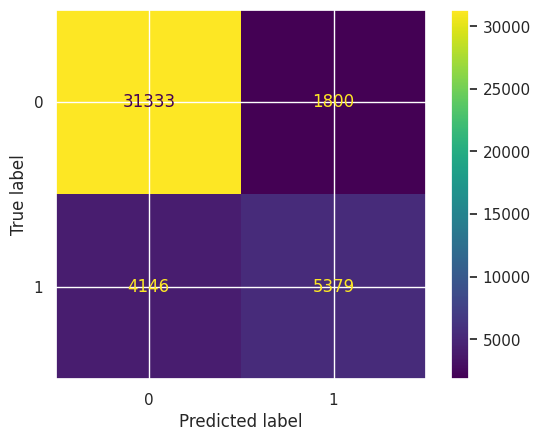

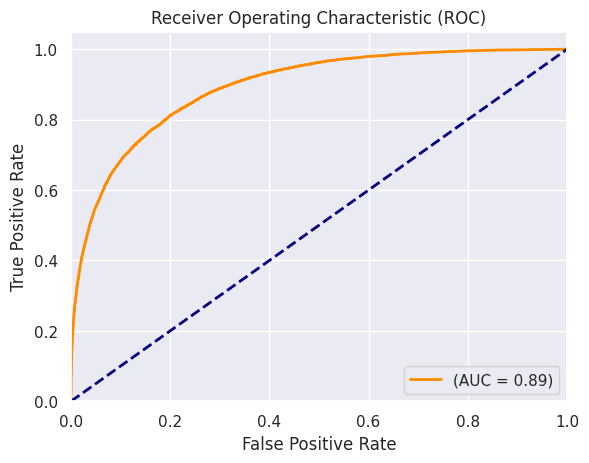

(0.8606123118758497,
 0.7492687003760969,
 0.5647244094488189,
 0.644037356321839,
 0.893655498066007,
 0.8606123118758497,
 0.892612848891127)

In [ ]:
evaluate_model(xgb, X_train, y_train, X_test, y_test)

Observations:

Highest accuracy score yet
Highest AUC yet
The model is decently fit

In [ ]:
xgb_smote = XGBClassifier()
xgb_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = xgb_smote.predict(X_test)
y_pred_smote

array([1, 0, 0, ..., 0, 0, 0])

Accuracy: 0.8565
Precision: 0.7166
Recall: 0.5911
F1 Score: 0.6478
Training Score: 0.9267
Testing Score: 0.8565
ROC AUC: 0.8879


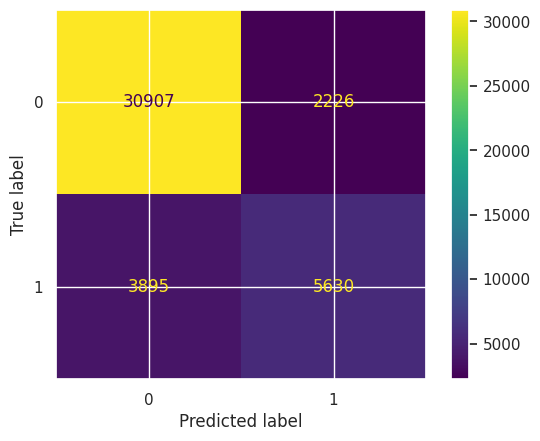

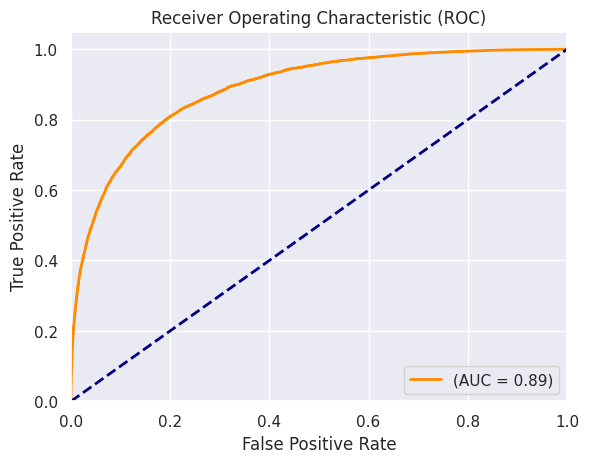

(0.8565099160767031,
 0.7166496945010183,
 0.5910761154855643,
 0.647833841551119,
 0.9267131363124004,
 0.8565099160767031,
 0.8878547265918564)

In [ ]:
evaluate_model(xgb_smote,X_train_resampled, y_train_resampled, X_test, y_test)

In [ ]:
xgb_params = {
    'n_estimators': [10, 35, 100],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.25],
}

xgb_gs = GridSearchCV(xgb_smote, xgb_params, scoring='accuracy', cv=10)
xgb_gs.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.25],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [10, 35, 100]},
             scoring='accuracy')

In [ ]:
xgb_gs.best_params_

{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}

In [ ]:
round(xgb_gs.best_score_, 4)

0.9053

Accuracy: 0.8592
Precision: 0.7302
Recall: 0.5858
F1 Score: 0.6501
Training Score: 0.9947
Testing Score: 0.8592
ROC AUC: 0.8916


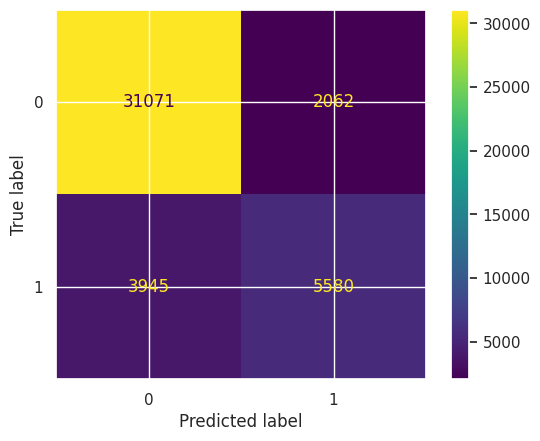

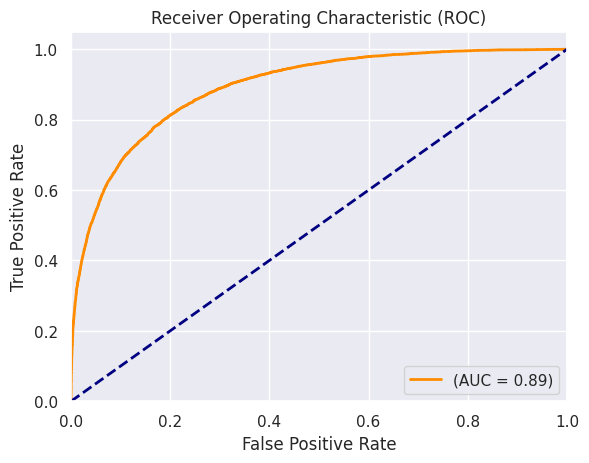

(0.8591823339115758,
 0.7301753467678618,
 0.5858267716535434,
 0.6500844643793323,
 0.9946944275293782,
 0.8591823339115758,
 0.8916013366315809)

In [ ]:
evaluate_model(xgb_gs,X_train_resampled, y_train_resampled, X_test, y_test)

Observations:

Slight improvement in some metrics but largely the same
AUC remains the same
Model fitness slightly decreased
Overall, not much of an impact

Feature Importances
Since this model achieved the best results, I want to explore the feature importances a bit more in depth.

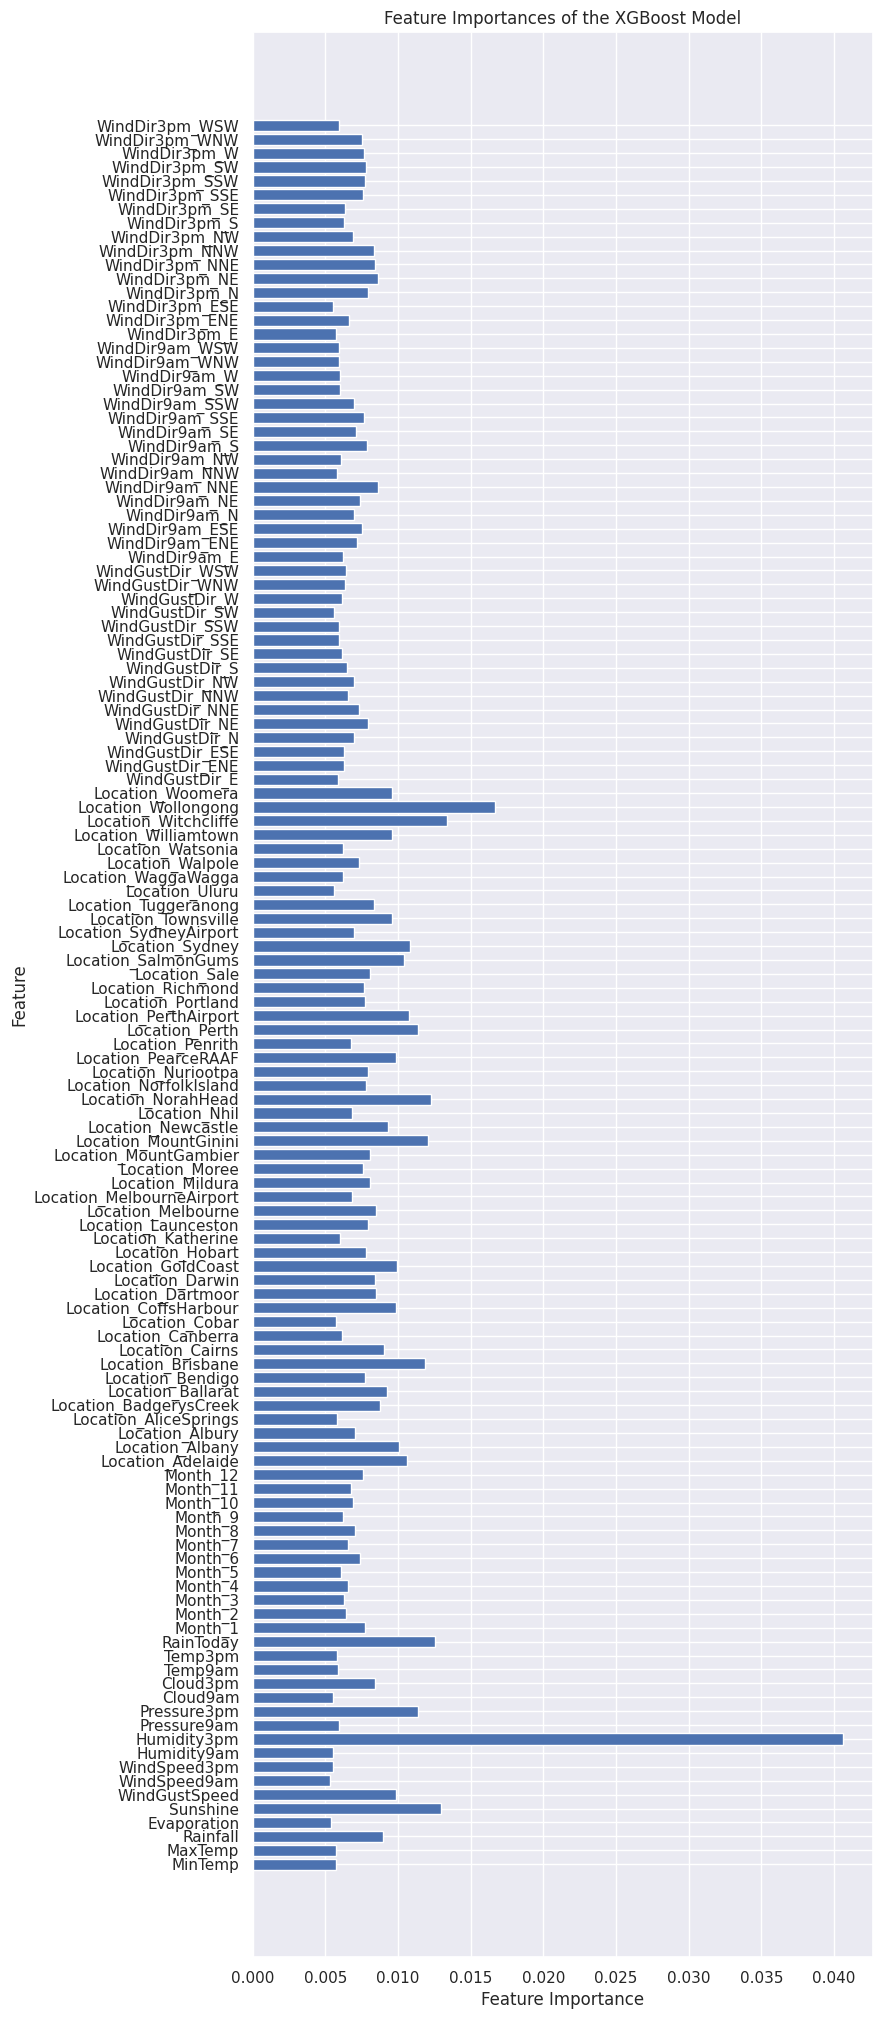

In [ ]:
best_xgb = xgb_gs.best_estimator_

plt.figure(figsize=(8, 25))
plt.barh(range(best_xgb.n_features_in_), best_xgb.feature_importances_)
plt.yticks(np.arange(best_xgb.n_features_in_), X_train.columns.values)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of the XGBoost Model');

Although the dummy variables were necessary for modeling the data, they are not conducive to analyzing the feature importances. As a result, I need to regroup the data into their primary categories to aggregate their category-level importances.

In [ ]:
feat_imp_df = pd.DataFrame(data={'Feature': df_final.columns.drop('RainTomorrow'),
                                 'Importance': best_xgb.feature_importances_
                                }
                           )
feat_imp_df['Group'] = feat_imp_df.Feature.apply(lambda x: x.split('_')[0])
feat_imp_df

,Feature,Importance,Group
0,MinTemp,0.005734,MinTemp
1,MaxTemp,0.005767,MaxTemp
2,Rainfall,0.009005,Rainfall
3,Evaporation,0.005389,Evaporation
4,Sunshine,0.012969,Sunshine
...,...,...,...
121,WindDir3pm_SSW,0.007768,WindDir3pm
122,WindDir3pm_SW,0.007832,WindDir3pm
123,WindDir3pm_W,0.007702,WindDir3pm
124,WindDir3pm_WNW,0.007541,WindDir3pm


In [ ]:
feat_imp_df.Group.value_counts()

,count
Group,
Location,49
WindDir3pm,16
WindDir9am,16
WindGustDir,16
Month,12
MaxTemp,1
RainToday,1
Temp3pm,1
Temp9am,1


These value counts align with the number of unique values for the categorical columns in the original dataframe (excluding Month which was engineered later), meaning the lambda function worked as expected.

In [ ]:
feat_imp_df_grouped = feat_imp_df.groupby(by='Group').sum()
feat_imp_df_grouped.sort_values('Importance', ascending=False, inplace=True)
feat_imp_df_grouped

,Feature,Importance
Group,,
Location,Location_AdelaideLocation_AlbanyLocation_Albur...,0.428995
WindDir3pm,WindDir3pm_EWindDir3pm_ENEWindDir3pm_ESEWindDi...,0.115179
WindDir9am,WindDir9am_EWindDir9am_ENEWindDir9am_ESEWindDi...,0.109501
WindGustDir,WindGustDir_EWindGustDir_ENEWindGustDir_ESEWin...,0.103443
Month,Month_1Month_2Month_3Month_4Month_5Month_6Mont...,0.081561
Humidity3pm,Humidity3pm,0.040610
Sunshine,Sunshine,0.012969
RainToday,RainToday,0.012557
Pressure3pm,Pressure3pm,0.011413


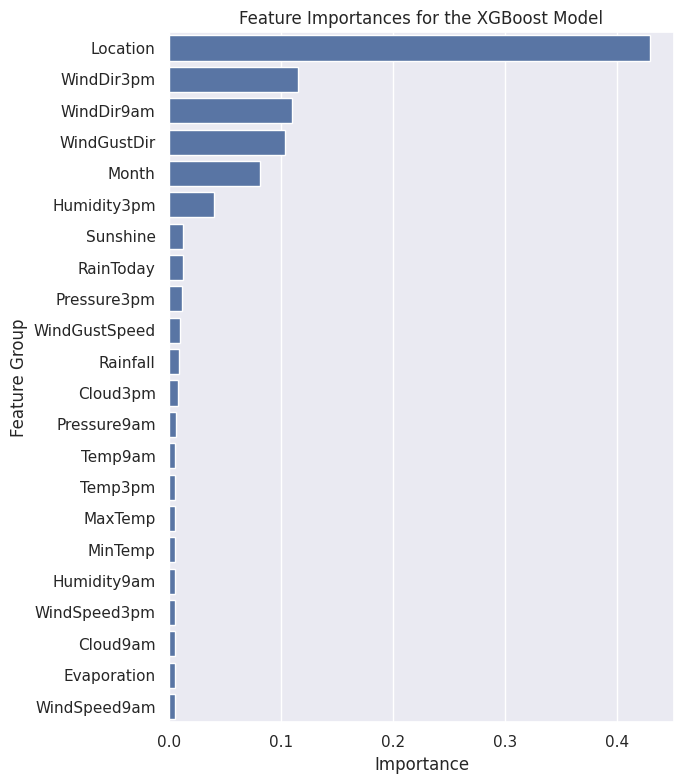

In [ ]:
plt.figure(figsize=(7, 8))
sns.barplot(y=feat_imp_df_grouped.index,
            x=feat_imp_df_grouped.Importance,
            orient='h',
            color=sns.color_palette()[0]
           )
plt.title('Feature Importances for the XGBoost Model')
plt.ylabel('Feature Group')
plt.xlabel('Importance')
plt.tight_layout()


Model Comparisons

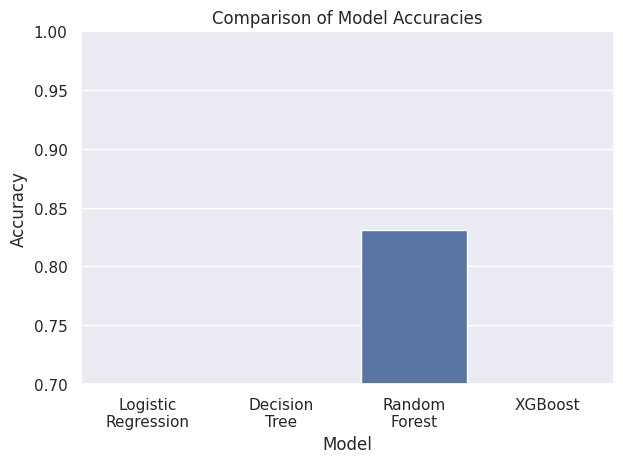

In [ ]:
models = [logreg_gs, clf_gs, rf_gs, xgb_gs]

sns.barplot(x=['Logistic\nRegression', 'Decision\nTree', 'Random\nForest', 'XGBoost'],
            y=[model.best_score_ for model in models]
           )
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.title('Comparison of Model Accuracies')
plt.tight_layout()

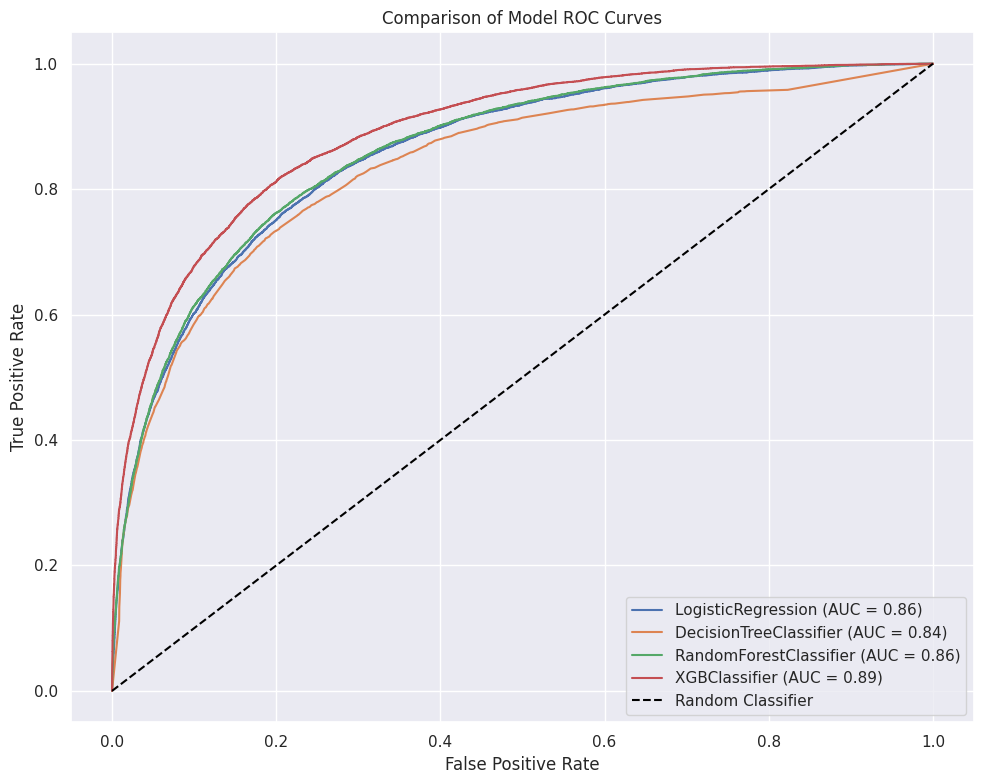

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create a plot
fig, ax = plt.subplots(figsize=(10, 8))

# Iterate over each model to plot ROC curves
for model in models:
    # Get the probability estimates for the positive class
    y_prob = model.best_estimator_.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Get the model name
    model_name = type(model.best_estimator_).__name__

    # Plot ROC curve
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add a diagonal line for random classifier
ax.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Classifier')

# Set titles and labels
ax.set_title('Comparison of Model ROC Curves')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# Add a legend to distinguish between different models
ax.legend(loc='lower right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Conclusion

Results

The best performing model is the hyperparameter-tuned XGBoost model with an accuracy of approximately 86%. The scores for both the training and testing data were similar, reducing concerns of the model being overfit. In terms of feature importances, Humidity3pm is the single most important feature. However, when grouping the features back into their original categories, the following groups have the most importance:

Location

WindDir3pm

WindDir9am

WindGustDir

Month

Humidity3pm

Next Steps

While this model is a good starting point for rain prediction in Australia, there are several ways in which the model could be improved upon:

Further hyperparameter tuning

Engineering new features such as trailing amounts of rain or sunshine

Collecting additional data from nearby countries (for example, does rain originating in Indonesia or New Zealand have predictive power?)

Attempting to predict the amount of rainfall